In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

# ipywidgets used to interact with graphs
from ipywidgets import interact

# Increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline

In [5]:
housing = pd.read_csv('./data/housing.csv')

housing = housing.dropna()
housing['ocean_proximity'] = housing.ocean_proximity.map({'<1H OCEAN':0, 'INLAND':1, 'NEAR OCEAN':2, 'NEAR BAY':3, 'ISLAND':4})

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [6]:
housing.shape

(20433, 10)

In [9]:
X = housing.drop(['longitude', 'latitude', 'median_house_value'], axis=1)
y = housing.median_house_value

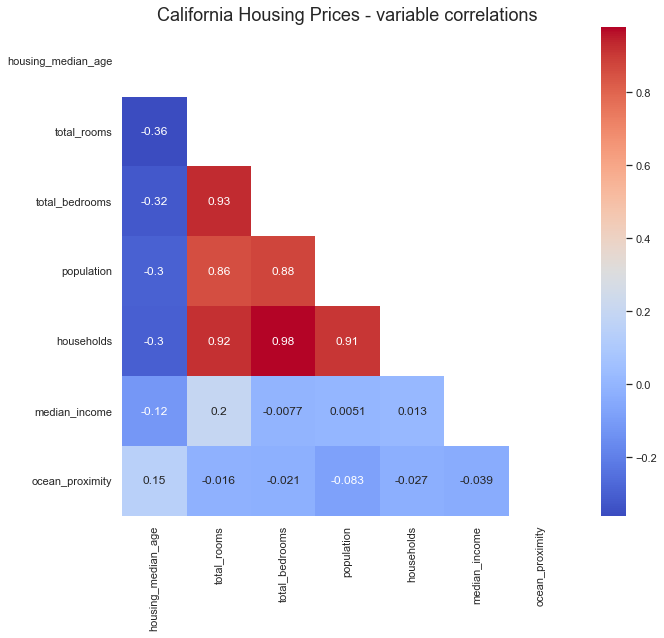

In [10]:
# Half-masked Correlation Heatmap with Pearson correlation coefficient annotation 
# 'total_bedrooms' should be excluded from feature matrix

plt.figure(figsize=(9, 9))
sns.set(font_scale=1)

mask = np.zeros_like(X.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    sns.heatmap(X.corr(), mask=mask, annot=True, cmap='coolwarm')
    
plt.title("California Housing Prices - variable correlations", fontsize=18)
plt.show();

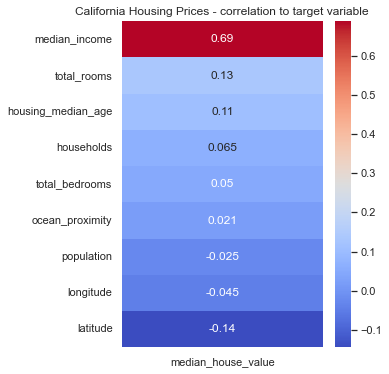

In [12]:
# Correlations of potential features versus the target variable median_house_value (ocean proximity automatically excluded)
# 'median_income', 'total_rooms' and 'housing_median_age' have strongest correlation with target variable
# 'households' has more correlation than 'population' so maybe exclude 'population' from feature matrix
plt.figure(figsize=(4, 6))
sns.set(font_scale=1)

sns.heatmap(housing.corr()[['median_house_value']].sort_values('median_house_value', ascending=False)[1:], annot=True, cmap='coolwarm')

plt.title("California Housing Prices - correlation to target variable")
plt.show();

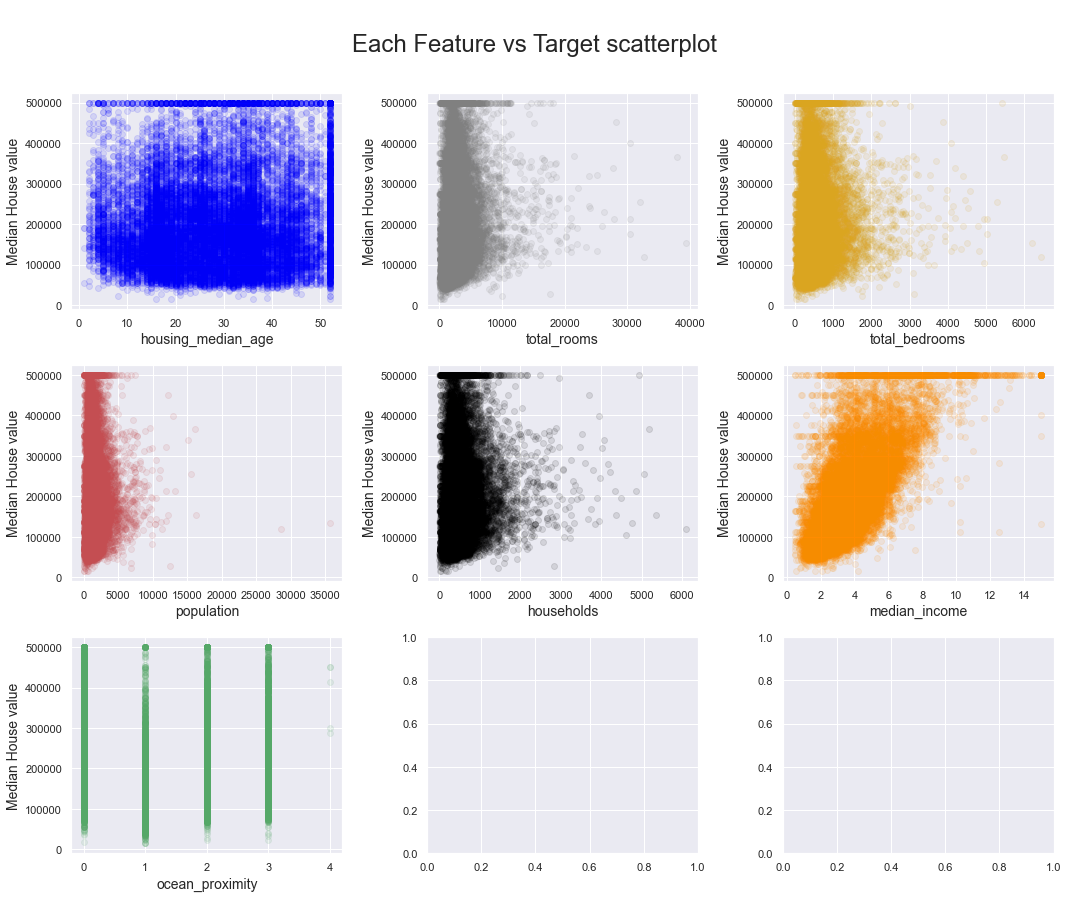

In [17]:
# Generate all feature vs target scatterplots - confirms 'median_income' has most linear relationship
rows = math.ceil(len(X.columns) / 3)

fig, ax = plt.subplots(nrows=rows, ncols=3, figsize=(15, 12))

color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']

plt.subplots_adjust(wspace=0.3, hspace=0.3)

# function turns matrix to vector
ax = ax.ravel()

for i, column in enumerate(X.columns):
    ax[i].scatter(X[column], y, color=color_choices[i % len(color_choices)], alpha=0.1)
    ax[i].set_ylabel("Median House value", fontsize=14)
    ax[i].set_xlabel(column, fontsize=14)
    
fig.suptitle("\nEach Feature vs Target scatterplot", size=24)
fig.tight_layout()
fig.subplots_adjust(bottom=0, top=0.88)
plt.show();